Magnetic field interpolation (J-TEXT)
=====================================

In [1]:
import fusionsc as fsc
from fusionsc.devices import jtext
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

Here we show a simple example to evaluate the magnetic field at desired points. We use the function "MagneticConfig.interpolateXyz" to evaluate our field.

In [2]:
help(fsc.magnetics.MagneticConfig.interpolateXyz)

Help on AsyncMethodDescriptor in module fusionsc.magnetics:

interpolateXyz(self, points, grid=None) -> Any
                    Evaluates the magnetic field in the given coordinates. Outside the grid, the field will use the constant
                    values (in slab coordinates) at the grid boundary.
            
                    Parameters:
                            - points: A numpy-array of shape [3, ...] (at least 1D) with the points in x, y, z coordinates.
                            - grid: An optional grid parameter required if the field is not yet computed. The grid
                    
                    Returns:
                            A numpy array of shape points.shape with the field as x, y, z field.
                    
    *Note* Has :ref:`asynchronous variant<Asynchronous Function>` '.asnc(...)' that returns Promise[...]



In [3]:
efitExample = jtext.exampleGeqdsk()
field = fsc.magnetics.MagneticConfig.fromEFit(efitExample).compute(jtext.defaultGrid())

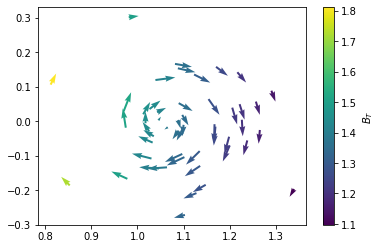

In [4]:
r, z = np.random.multivariate_normal(
    mean = [1.1, 0], cov = [[0.01, 0], [0, 0.01]],
    size = 50
).T

x = r
y = 0 * r

Bx, By, Bz = field.interpolateXyz([x, y, z])

plt.quiver(r, z, Bx, Bz, By)
plt.colorbar(label = "$B_T$")